In [7]:
# Load modules for data manipulation
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import call
import pandas as pd
import numpy as np
import time
import os

In [2]:
# Load modules for machine learning
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Calculate the accurancy of the model
from sklearn.metrics import accuracy_score, classification_report

# For drawing the graph
from sklearn.tree import export_graphviz

In [3]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature name logistic regressions
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + '-FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
    plt.savefig('{}.svg'.format(model_type))

In [4]:
def log_reg(data, ecos, cols):
    ''' The Model'''
    
    # Labels are the values we want to predict
    labels = np.array(data['ECO'])

    # Remove the labels from the features
    features = np.array(data[cols])

    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state=42)

    # Instantiate model with 1000 decision trees
    logisticRegr = LogisticRegression()
    
    # Train the model on training data
    logisticRegr.fit(train_features, train_labels)
    
    # Use the forest's predict method on the test data
    predictions = logisticRegr.predict(test_features)

    # Classification report
    print(classification_report(test_labels, predictions.round()))

In [5]:
def knn(data, ecos, cols):
    ''' The Model'''

    # Labels are the values we want to predict
    labels = np.array(data['ECO'])

    # Remove the labels from the features
    features = np.array(data[cols])

    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state=42)

    # Instantiate model with 1000 decision trees
    model = KNeighborsClassifier(n_neighbors=5)
    
    # Train the model on training data
    model.fit(train_features, train_labels)
    
    # Use the forest's predict method on the test data
    predictions = model.predict(test_features)

    # Classification report
    print(classification_report(test_labels, predictions.round()))

In [6]:
# Get the data from the other notebook
%store -r data
%store -r cols
%store -r eco

# -------------------------------------------------------------------------------------------------------------

In [22]:
knn(data, eco, cols)

              precision    recall  f1-score   support

       False       0.81      0.86      0.84     69151
        True       0.65      0.58      0.61     32128

    accuracy                           0.77    101279
   macro avg       0.73      0.72      0.72    101279
weighted avg       0.76      0.77      0.77    101279



In [9]:
''' The Model'''

# Labels are the values we want to predict
labels = np.array(data['ECO'])

# Remove the labels from the features
features = np.array(data[cols])

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [13]:
# Instantiate model with 300 decision trees
rf = RandomForestRegressor(n_estimators = 300)

st = time.time()

# Train the model on training data
rf.fit(train_features, train_labels)

fn = time.time()
print(fn - st)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

print(time.time() - fn)

# Classification report
print(classification_report(test_labels, predictions.round()))

3.4809112548828125e-05
0.00012087821960449219
              precision    recall  f1-score   support

       False       0.88      0.91      0.90     69192
        True       0.79      0.74      0.76     32087

    accuracy                           0.86    101279
   macro avg       0.84      0.82      0.83    101279
weighted avg       0.85      0.86      0.85    101279



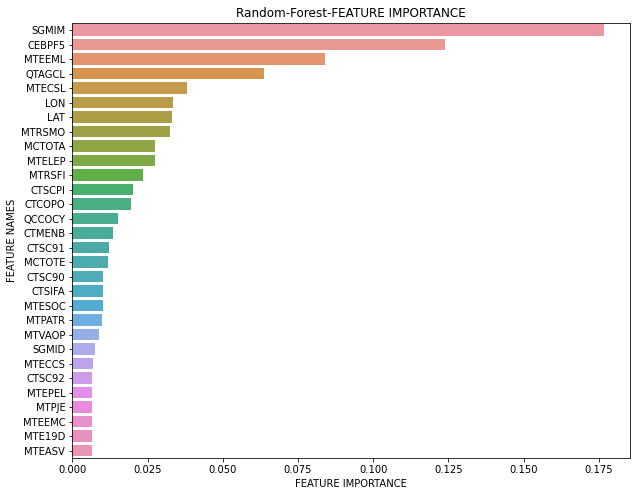

In [11]:
shit = sorted(zip(cols, rf.feature_importances_), key=lambda x: x[1], reverse=True)
plot_feature_importance([i[1] for i in shit[:30]],[i[0] for i in shit[:30]],'Random-Forest')

In [23]:
for i in shit:
    print(i)

('SGMIM', 0.17660154415080528)
('CEBPF5', 0.12368237905432455)
('MTEEML', 0.08405824061293171)
('QTAGCL', 0.06364124681682379)
('MTECSL', 0.03808418227963695)
('LON', 0.033483036515083574)
('LAT', 0.03319951649956871)
('MTRSMO', 0.03235911454900558)
('MCTOTA', 0.027613800058900517)
('MTELEP', 0.02753763678124669)
('MTRSFI', 0.023415540528350327)
('CTSCPI', 0.020052619399013503)
('CTCOPO', 0.019465713752471324)
('QCCOCY', 0.015198808411098285)
('CTMENB', 0.013501095014275226)
('CTSC91', 0.012088669042533922)
('MCTOTE', 0.011882241017618785)
('CTSC90', 0.010335337155660795)
('CTSIFA', 0.010278099679308518)
('MTESOC', 0.01026896929722325)
('MTPATR', 0.009936104555068555)
('MTVAOP', 0.008938648230345023)
('SGMID', 0.007668684096252821)
('MTECCS', 0.00691783314328173)
('CTSC92', 0.0067005417340299574)
('MTEPEL', 0.006588429117581628)
('MTPJE', 0.006557811388739388)
('MTEEMC', 0.006499125013492889)
('MTE19D', 0.006454278248485765)
('MTEASV', 0.006453838773805018)
('MTRVFR', 0.006211824247227